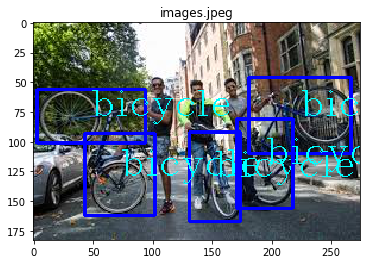

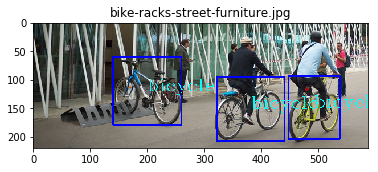

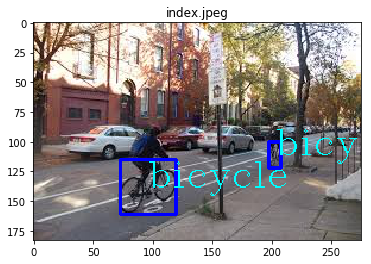

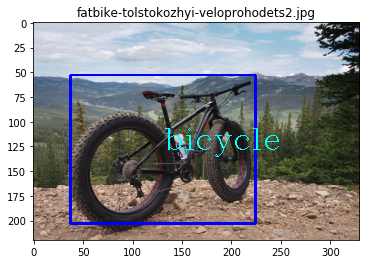

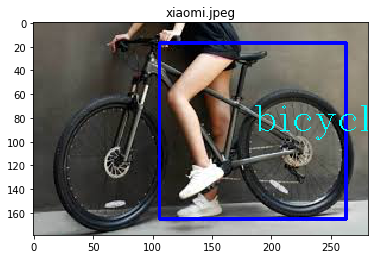

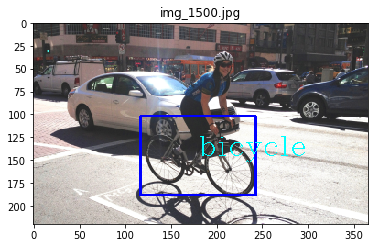

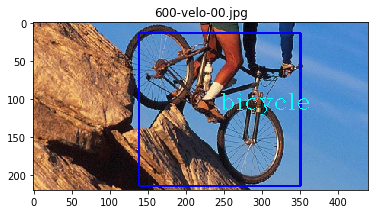

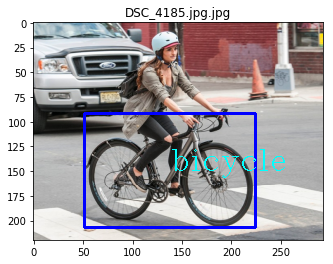

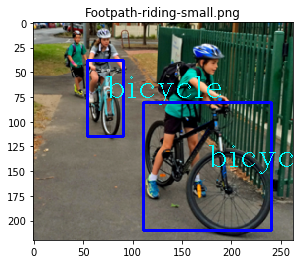

In [61]:
from pydarknet import Detector, Image
import cv2
import os
from matplotlib import pyplot as plt
from skimage import io
from skimage.transform import resize,rescale

def scale_image(img,w):
    if img.shape[0] < w :
        return img
    koeff = float(w)/float(img.shape[0])
    new_w = w
    new_h = int(img.shape[1]*koeff)
    return cv2.resize(img, (new_h,new_w), interpolation = cv2.INTER_AREA)

images_path = '../../images/google'
files = os.listdir(images_path)
net = Detector(bytes("cfg/yolov3.cfg", encoding="utf-8"), bytes("weights/yolov3.weights", encoding="utf-8"), 0, bytes("cfg/coco.data",encoding="utf-8"))
#net = Detector(bytes("cfg/yolov3-tiny.cfg", encoding="utf-8"), bytes("weights/yolov3-tiny.weights", encoding="utf-8"), 0, bytes("cfg/coco.data",encoding="utf-8"))

for filename in reversed(files):
    img = cv2.imread(images_path+"/"+filename)
    img = scale_image(img,220)
    
    img2 = Image(img)
    results = net.detect(img2)
    for cat, score, bounds in results:
        category = str(cat.decode("utf-8"))
        if category == "bicycle":
            x, y, w, h = bounds
            cv2.rectangle(img, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (255, 0, 0), thickness=2)
            cv2.putText(img,str(cat.decode("utf-8")),(int(x),int(y)),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,0))
    plt.figure()
    plt.title(filename)
    pyImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(pyImg)
